In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
label = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [51]:
# 행렬은 대문자, 벡터는 소문자 관습
X = iris.iloc[:, :4].values
X = X[:, [0,2]]
y = iris.iloc[:, 4].map(label).values

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

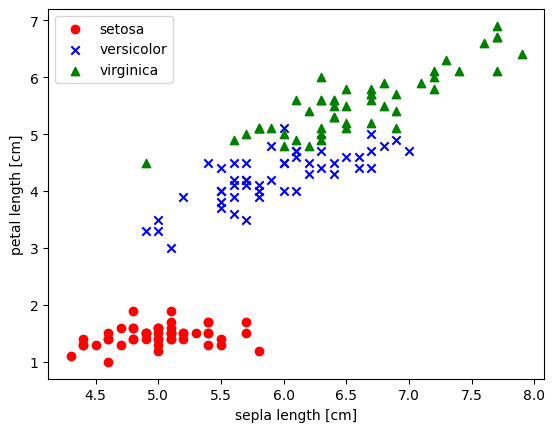

In [52]:
plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='o', label='setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], color='green', marker='^', label='virginica')
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [53]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


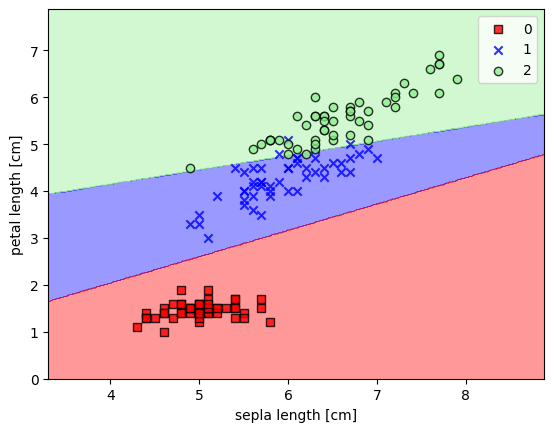

In [54]:
# 모델이라고 할 만한 것들 중에서 가장 간단한 것
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100, random_state=1)
lr.fit(X, y)

plot_decision_regions(X, y, lr)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

# 오후

In [23]:
pol = pd.read_csv('https://github.com/dknife/ML/raw/main/data/pollution.csv')
pol

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


In [38]:
X = pol['input'].values.reshape(-1,1)
y = pol['pollution'].values.reshape(-1,1)
X.shape

(100, 1)

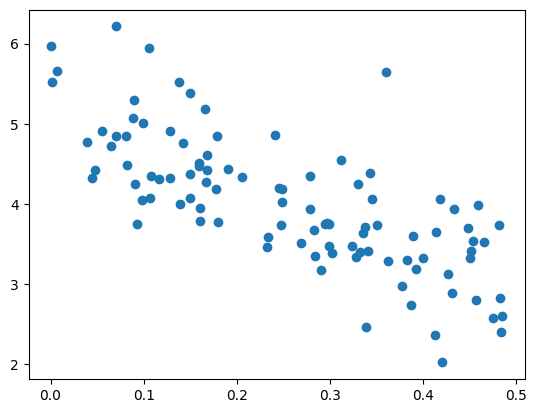

In [39]:
plt.figure()
plt.scatter(X,y)
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X, y)


LinearRegression()

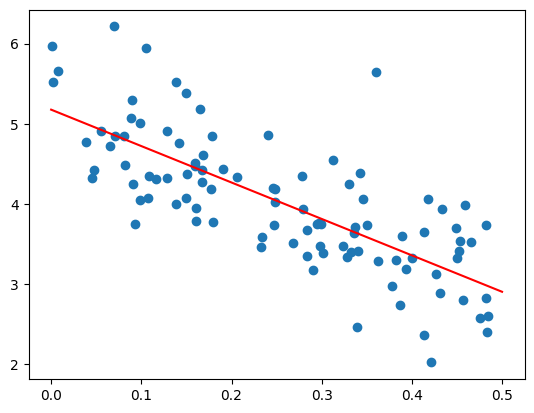

In [43]:
plt.figure()
plt.scatter(X,y)
plt.plot([0,0.5], lr2.predict([[0], [0.5]]), color='red')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

p = lr2.predict(X)
print(mean_squared_error(y, p))
print(mean_absolute_error(y, p))

0.9666666666666667


In [61]:
from sklearn.metrics import accuracy_score

p = lr.predict(X)
print(accuracy_score(y, p))
print(np.sum(y == p) / len(y))

0.9666666666666667
0.9666666666666667


C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


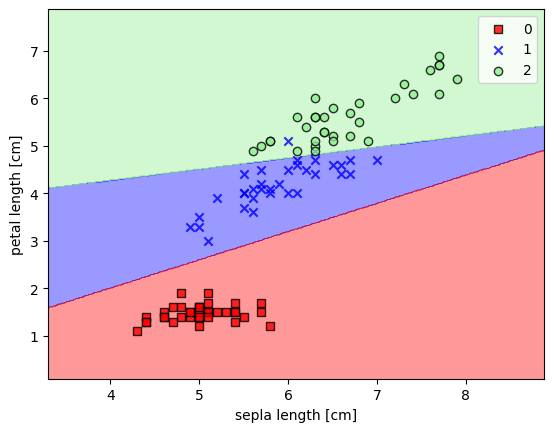

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100, random_state=7)
lr.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, lr)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


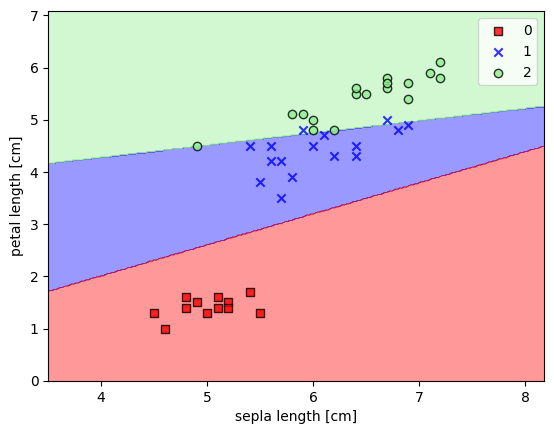

In [84]:
plot_decision_regions(X_test, y_test, lr)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [85]:
p_train = lr.predict(X_train)
print(accuracy_score(y_train, p_train))

p_test= lr.predict(X_test)
print(accuracy_score(y_test, p_test))

0.9809523809523809
0.9555555555555556


In [88]:
from sklearn.preprocessing import PolynomialFeatures

life = pd.read_csv('https://github.com/dknife/ML/raw/main/data/life_expectancy.csv')
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [91]:
life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'BMI', 'Polio', 'GDP', 'Thinness 1-19 years']]
life

,Life expectancy,Alcohol,Percentage expenditure,BMI,Polio,GDP,Thinness 1-19 years
0,65.0,0.01,71.279624,19.1,6.0,584.259210,17.2
1,59.9,0.01,73.523582,18.6,58.0,612.696514,17.5
2,59.9,0.01,73.219243,18.1,62.0,631.744976,17.7
3,59.5,0.01,78.184215,17.6,67.0,669.959000,17.9
4,59.2,0.01,7.097109,17.2,68.0,63.537231,18.2
...,...,...,...,...,...,...,...
2933,44.3,4.36,0.000000,27.1,67.0,454.366654,9.4
2934,44.5,4.06,0.000000,26.7,7.0,453.351155,9.8
2935,44.8,4.43,0.000000,26.3,73.0,57.348340,1.2
2936,45.3,1.72,0.000000,25.9,76.0,548.587312,1.6


In [92]:
life.dropna(inplace=True)

In [94]:
X = life[['Alcohol', 'Percentage expenditure', 'BMI', 'Polio', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [95]:
# 원래라면 train / test split해야함. 

# 비선형을 선형으로 왜곡시켜 펴준다.
pf = PolynomialFeatures(degree=3)
X = pf.fit_transform(X)

In [98]:
X.shape

(2306, 84)

In [111]:
y.shape

(10, 1)

In [99]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

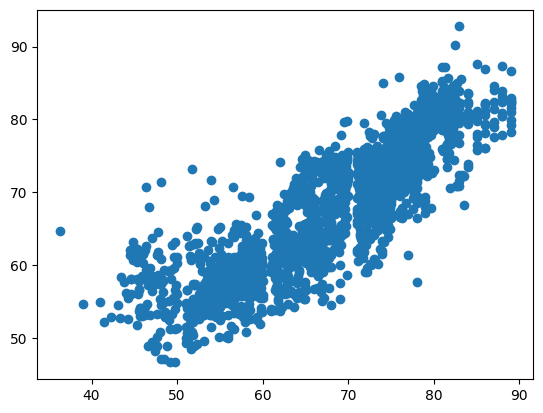

In [100]:
p = lr.predict(X)
plt.figure()
plt.scatter(y, p)
plt.show()

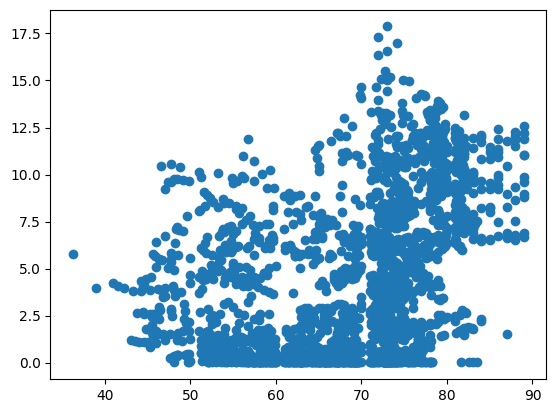

In [101]:
p = lr.predict(X)
plt.figure()
plt.scatter(y, life['Alcohol'])
plt.show()

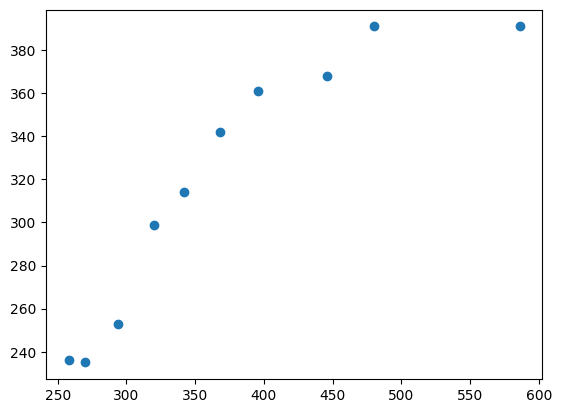

In [102]:
X = np.array([258, 270, 294, 320, 342, 368, 396, 446, 480, 586])
y = np.array([236, 235, 253, 299, 314, 342, 361, 368, 391, 391])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.figure()
plt.scatter(X, y)
plt.show()

In [103]:
lr1 = LinearRegression()
lr1.fit(X, y)

lr2 = LinearRegression()
pf = PolynomialFeatures(degree=2)
X_pf = pf.fit_transform(X)
lr2.fit(X_pf, y)

LinearRegression()

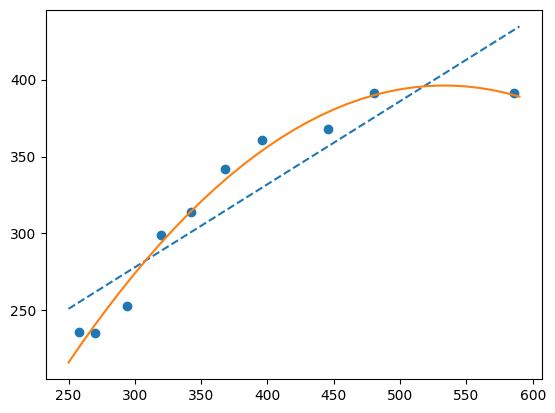

In [110]:
Xr = np.arange(250, 600, 10).reshape(-1,1)

plt.figure()
plt.scatter(X, y)
plt.plot(Xr, lr1.predict(Xr), linestyle='--')
plt.plot(Xr, lr2.predict(pf.transform(Xr)))

plt.show()